<a href="https://colab.research.google.com/github/srsjoe/toyota/blob/main/ToyotaCarPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 : Identify the problem

In this notebook we will conduct a data analysis on Toyota data. We will analyse, visualize and predict toyota car prices using some methods like linear regression, decision tree, machine learning.


#Task 2: Load the libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Task 3 : Load the data

In [283]:
data = pd.read_csv('https://raw.githubusercontent.com/srsjoe/toyota/main/toyota.csv')


#Task 4: EDA-Exploratory Data analysis

In [284]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [286]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [287]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [288]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [289]:
data.shape

(6738, 9)

In [290]:
for i in data.columns:
    print(i,'has ', set(data[i]))

model has  {' Land Cruiser', ' Supra', ' RAV4', ' Urban Cruiser', ' Verso', ' C-HR', ' PROACE VERSO', ' Corolla', ' Hilux', ' IQ', ' Verso-S', ' Yaris', ' Prius', ' GT86', ' Auris', ' Avensis', ' Aygo', ' Camry'}
year has  {1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}
price has  {8195, 16390, 8199, 8200, 8202, 8208, 8210, 24595, 8212, 8220, 8222, 8225, 40995, 16422, 40999, 8248, 8250, 8253, 16450, 8260, 8265, 8268, 8274, 8275, 8282, 32860, 8290, 8291, 8295, 16490, 16491, 8298, 8299, 8300, 16495, 16498, 8306, 16500, 16499, 24695, 8326, 8333, 8345, 8350, 8360, 24748, 8369, 8375, 16570, 8378, 8383, 8389, 8390, 8395, 8398, 8399, 8400, 8402, 8405, 24790, 16600, 24795, 8412, 32990, 24798, 32993, 32995, 8420, 33000, 8432, 8440, 8450, 16650, 8461, 8465, 8469, 8472, 8475, 8477, 8480, 16675, 8485, 8489, 8490, 8491, 8495, 16688, 16689, 8498, 16691, 8500, 8499, 16690, 16700, 8510, 16711, 49490, 49499, 8540

In [291]:
for col in data.columns:
    if data[col].dtype == object:
         print(col, data[col][ data[col] == '?'].count())

model 0
transmission 0
fuelType 0


In [292]:
data.sort_values('price', ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6711,Supra,2019,59995,Automatic,9909,Other,150,34.5,3.0
6670,Land Cruiser,2019,54991,Semi-Auto,1000,Diesel,145,30.1,2.8
6695,Land Cruiser,2020,54550,Automatic,4000,Diesel,150,30.1,2.8
6688,Land Cruiser,2020,52990,Automatic,1244,Diesel,145,30.1,2.8
6672,Land Cruiser,2020,52291,Semi-Auto,3104,Diesel,145,30.1,2.8
6703,Supra,2019,51995,Semi-Auto,250,Petrol,145,34.5,3.0
6704,Supra,2019,51995,Semi-Auto,1902,Petrol,145,34.5,3.0
6707,Supra,2019,51995,Semi-Auto,4153,Petrol,145,34.5,3.0
6682,Land Cruiser,2020,50995,Automatic,3500,Diesel,145,30.1,2.8
6661,Land Cruiser,2020,50995,Semi-Auto,3390,Diesel,145,30.1,2.8


In [293]:
data.sort_values('price', ascending=True).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6427,Avensis,2003,850,Manual,167054,Diesel,205,48.7,2.0
289,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6
2447,Yaris,2002,950,Manual,104000,Petrol,200,40.4,1.5
2635,Yaris,2003,975,Manual,107000,Petrol,145,50.4,1.0
6431,Avensis,2007,1200,Automatic,120000,Petrol,300,36.7,1.8
263,Corolla,2004,1250,Manual,111000,Petrol,260,37.2,1.8
5496,Aygo,2005,1295,Manual,88836,Petrol,20,61.4,1.0
74,Corolla,2005,1300,Manual,129000,Petrol,260,36.7,1.8
259,Corolla,2003,1495,Manual,89000,Petrol,235,39.2,1.6
2830,Yaris,2006,1550,Manual,100418,Petrol,125,52.3,1.0


In [294]:
nnpDf = data.sort_values("price",ascending = False).iloc[131:]
nnpDf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6717,Camry,2019,28495,Automatic,4998,Hybrid,140,52.3,2.5
6640,PROACE VERSO,2019,28456,Automatic,9119,Diesel,145,38.7,2.0
680,RAV4,2019,28222,Automatic,10570,Hybrid,140,49.6,2.5
201,Corolla,2020,28000,Automatic,10,Hybrid,140,56.5,1.8
72,GT86,2020,28000,Manual,650,Petrol,145,33.2,2.0
...,...,...,...,...,...,...,...,...,...
6431,Avensis,2007,1200,Automatic,120000,Petrol,300,36.7,1.8
2635,Yaris,2003,975,Manual,107000,Petrol,145,50.4,1.0
2447,Yaris,2002,950,Manual,104000,Petrol,200,40.4,1.5
289,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6


In [295]:
nnpDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,2016.708340,12047.132738,23125.210988,93.260179,63.390707,1.449765
std,2.199791,5303.715294,19155.413393,73.337385,15.271139,0.409214
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8200.000000,9695.500000,0.000000,56.500000,1.000000
50%,2017.000000,10660.000000,18837.000000,135.000000,64.200000,1.500000
75%,2018.000000,14500.000000,31242.000000,145.000000,70.600000,1.800000
max,2020.000000,28495.000000,174419.000000,565.000000,235.000000,4.200000


In [296]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


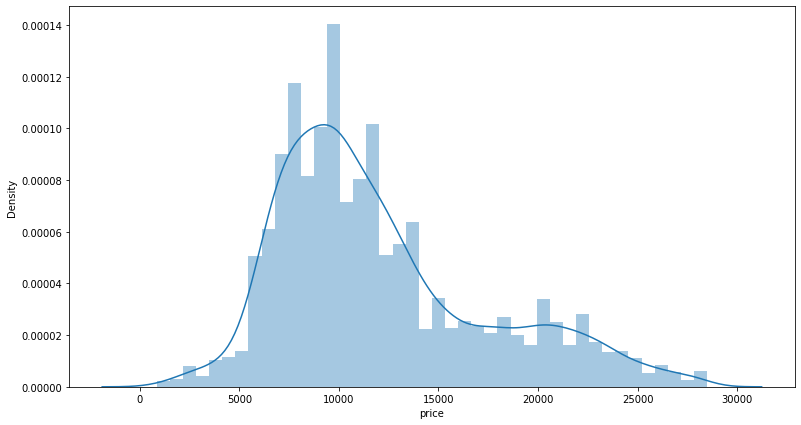

In [297]:
plt.figure(figsize=(13,7))
sns.distplot(nnpDf["price"])
plt.show()

In [298]:
nnpDf.groupby('year').mean()['price']

year
1998    19990.000000
1999     1995.000000
2000     2695.000000
2001      899.000000
2002     1811.000000
2003     1984.166667
2004     3893.571429
2005     3054.416667
2006     3109.454545
2007     2797.500000
2008     3926.210526
2009     4160.413793
2010     5397.500000
2011     5341.425000
2012     6634.595238
2013     8404.656863
2014     8901.854286
2015     9661.647399
2016    11643.850101
2017    12101.976640
2018    12337.223100
2019    15334.824459
2020    18951.257426
Name: price, dtype: float64

In [299]:
nnpDf[nnpDf.year != 1970].groupby("year").mean()["price"]

year
1998    19990.000000
1999     1995.000000
2000     2695.000000
2001      899.000000
2002     1811.000000
2003     1984.166667
2004     3893.571429
2005     3054.416667
2006     3109.454545
2007     2797.500000
2008     3926.210526
2009     4160.413793
2010     5397.500000
2011     5341.425000
2012     6634.595238
2013     8404.656863
2014     8901.854286
2015     9661.647399
2016    11643.850101
2017    12101.976640
2018    12337.223100
2019    15334.824459
2020    18951.257426
Name: price, dtype: float64

In [300]:
nnpDf.drop('model', axis=1,inplace=True)

In [301]:
nnpDf.drop('fuelType', axis=1, inplace=True)

In [302]:
nnpDf.drop('transmission', axis=1, inplace=True)

In [303]:
df = nnpDf

In [304]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6717,2019,28495,4998,140,52.3,2.5
6640,2019,28456,9119,145,38.7,2.0
680,2019,28222,10570,140,49.6,2.5
201,2020,28000,10,140,56.5,1.8
72,2020,28000,650,145,33.2,2.0


#Task 5: Data Visualization

---



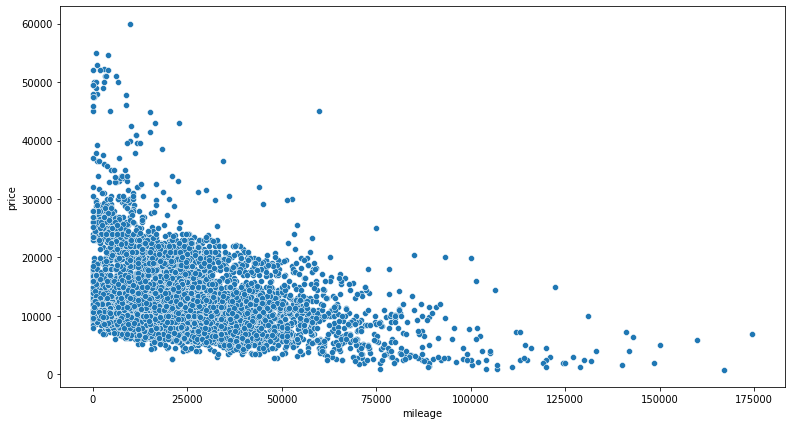

In [305]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()

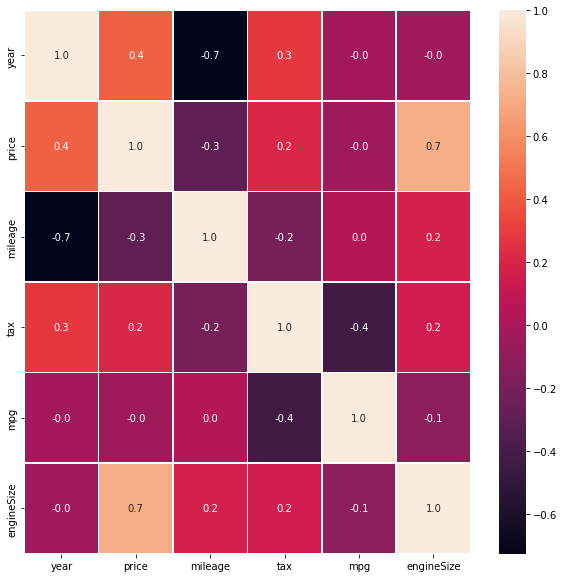

In [306]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


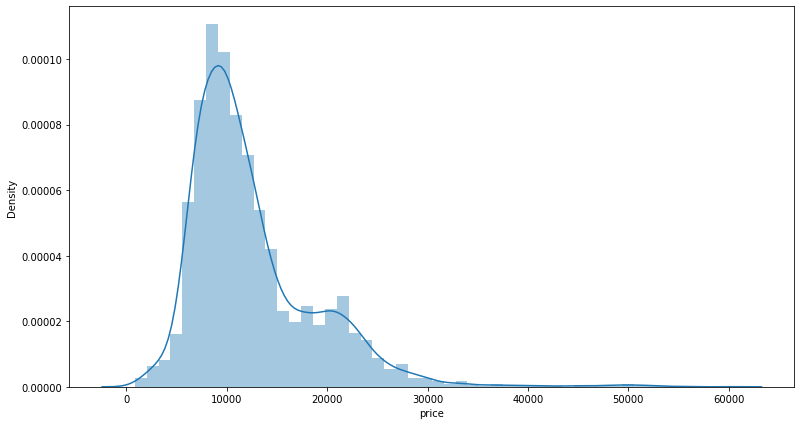

In [307]:
plt.figure(figsize=(13,7))
sns.distplot(data["price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


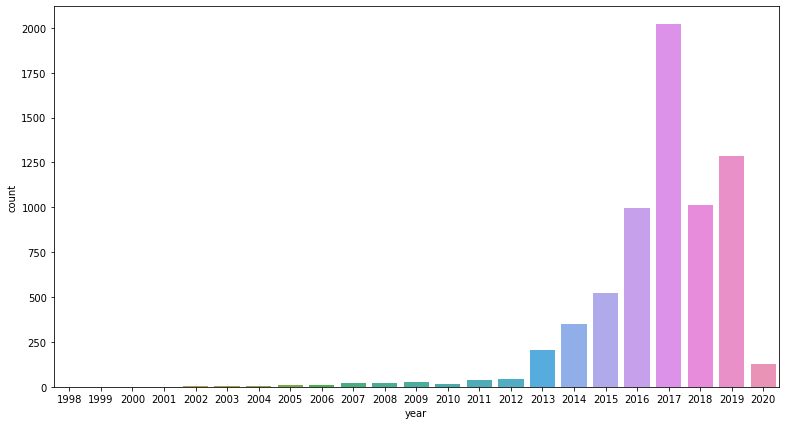

In [308]:
plt.figure(figsize=(13,7))
sns.countplot(data.year)
plt.show()

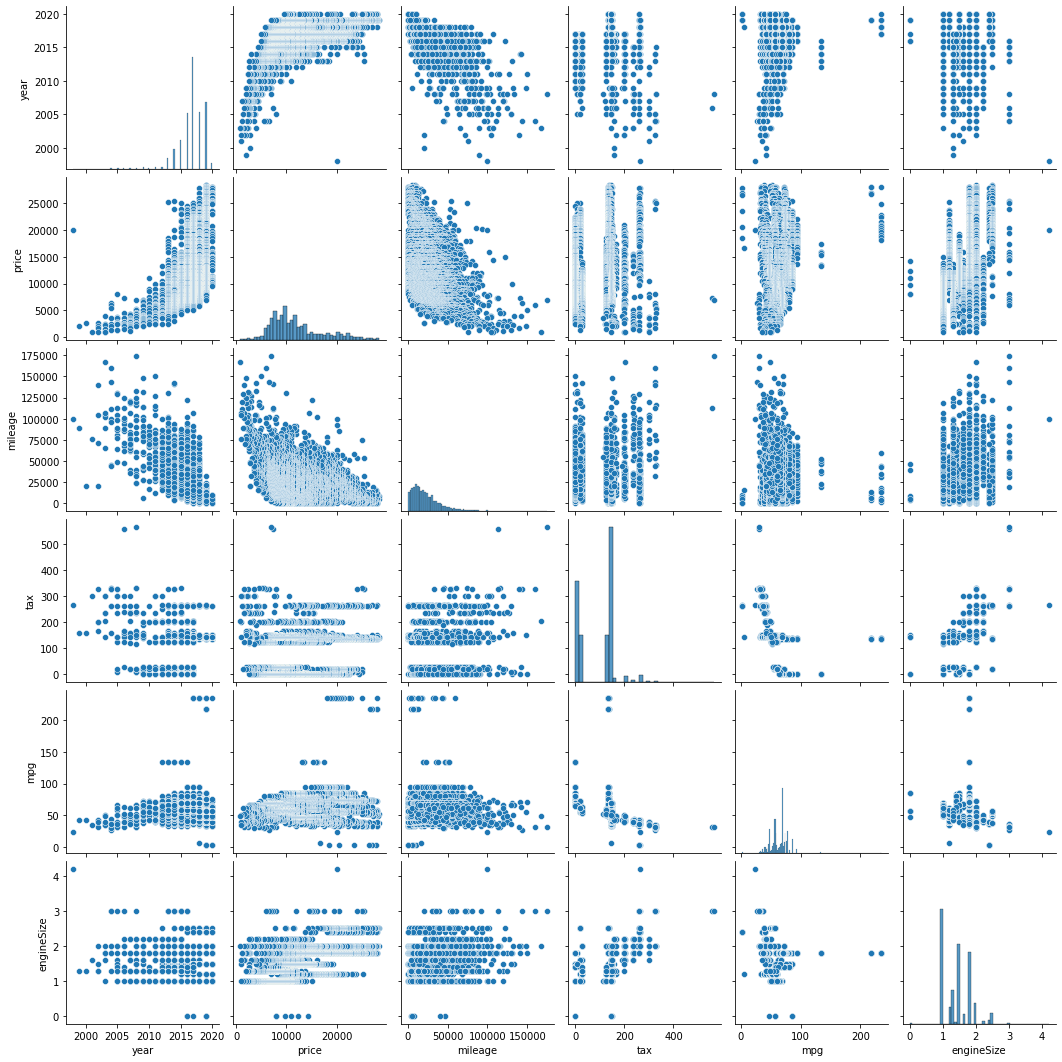

In [309]:
sns.pairplot(df)
plt.show()

#Task 6: Train Test Split

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'],axis=1), data['price'], test_size=0.3, random_state=1)

In [312]:
from sklearn.linear_model import LogisticRegression

In [313]:
logmodel = LogisticRegression()

In [314]:
from sklearn.metrics import classification_report

In [315]:
y = df['price'].values
X = df.drop('price', axis=1).values

In [316]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)



In [317]:
X.shape

(6607, 5)

In [318]:
y.shape

(6607,)

#Task 7: Linear Regression


In [330]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred_lin_reg = linear_regression.predict(x_test)

In [331]:
print(f'y_test: {y_test}\nprediction: {y_pred_lin_reg}')

y_test: [15200 18795 10995 ... 17740 22995 11995]
prediction: [14946.23621383 16933.55199484  5634.00953081 ...  4119.29649937
  5257.96799098 18107.17917169]


#Task 8: KNN Analysis

In [319]:
from sklearn.model_selection import  train_test_split

In [320]:
X_train, X_test, y_train,y_test =train_test_split(scaled_features,df['price'], test_size=0.25)

In [321]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [322]:
pred= knn.predict(X_test)

In [323]:
from sklearn.metrics import classification_report, confusion_matrix

In [324]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


##Task 9 : Random Forest

In [325]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state= 0 ) # n_estimators = numbor of estimator tree
random_forest_reg.fit(X_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(X_test)

In [326]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.30)

In [327]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [328]:
predictions = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         850       0.00      0.00      0.00         1
         899       0.00      0.00      0.00         0
        1250       0.00      0.00      0.00         0
        1300       0.00      0.00      0.00         1
        1495       0.00      0.00      0.00         1
        1600       0.00      0.00      0.00         1
        1795       0.00      0.00      0.00         1
        1985       0.00      0.00      0.00         1
        1995       0.00      0.00      0.00         1
        2095       0.00      0.00      0.00         0
        2195       0.00      0.00      0.00         1
        2250       0.00      0.00      0.00         1
        2295       0.00      0.00      0.00         1
        2300       0.00      0.00      0.00         1
        2394       0.00      0.00      0.00         0
        2395       0.00      0.00      0.00         0
        2470       0.00      0.00      0.00         0
        2495       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1